In [1]:
!wget https://www.dropbox.com/sh/d1mq9gcs9ighksw/AADPVBR6Ulryl0zQtdKiOBLxa?dl=0

--2020-05-07 05:28:01--  https://www.dropbox.com/sh/d1mq9gcs9ighksw/AADPVBR6Ulryl0zQtdKiOBLxa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/d1mq9gcs9ighksw/AADPVBR6Ulryl0zQtdKiOBLxa [following]
--2020-05-07 05:28:01--  https://www.dropbox.com/sh/raw/d1mq9gcs9ighksw/AADPVBR6Ulryl0zQtdKiOBLxa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc00cd71c36fe87bba28df95442d.dl.dropboxusercontent.com/zip_download_get/Aaq-X2Va7myLGePupkd8b38H3lKt8ARZ_tH1-nEK2rABxQe0oWq6k8r4I4NKo1S82Ra8-K3mFcO8A4HPpYuF3mmh-p2NOy8W_liB6xD9ygjnwA [following]
--2020-05-07 05:28:02--  https://uc00cd71c36fe87bba28df95442d.dl.dropboxusercontent.com/zip_download_get/Aaq-X2Va7myLGePupkd8b38H3lKt8ARZ_tH1-nEK2rABxQe0oWq6k8r4I4NKo1S82Ra8-K3mFcO8A4HPp

In [0]:
!ls

'AADPVBR6Ulryl0zQtdKiOBLxa?dl=0'   test_pavJagI.csv
 sample_data			   train_6BJx641.csv
 sample_submission_bYgKb77.csv


In [0]:
from zipfile import ZipFile
file_name="AADPVBR6Ulryl0zQtdKiOBLxa?dl=0"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 2.4MB/s 


In [0]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import chart_studio.plotly as py
import plotly.graph_objs as go


%matplotlib inline
warnings.filterwarnings("ignore")


# Set seeds to make the experiment more reproducible.




train=pd.read_csv("train_6BJx641.csv",parse_dates=['datetime'])
test=pd.read_csv("test_pavJagI.csv",parse_dates=['datetime'])
sample=pd.read_csv("sample_submission_bYgKb77.csv")
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

train.shape, test.shape, sample.shape

Using TensorFlow backend.


((26496, 7), (8568, 6), (8568, 2))

In [0]:
train.dtypes

datetime                   datetime64[ns]
temperature                       float64
var1                              float64
pressure                          float64
windspeed                         float64
var2                               object
electricity_consumption           float64
dtype: object

In [0]:
from plotly.offline import init_notebook_mode, iplot
daily_consumption= go.Scatter(x=train['datetime'], y=train['electricity_consumption'])
layout = go.Layout(title='Dailyconsumption', xaxis=dict(title='Date'), yaxis=dict(title='Electricity Consumption'))
fig = go.Figure(data=[daily_consumption], layout=layout)
iplot(fig)

In [0]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['var2'] = le.fit_transform(train['var2'])
test['var2'] = le.fit_transform(test['var2'])

In [0]:
train.columns

Index(['datetime', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption'],
      dtype='object')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import gc
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import lightgbm as lgb
plt.style.use('ggplot')
%matplotlib inline
seed = 433

In [0]:
def date_time_feat(df,column):
    "Extract date time feature"
    df['day'] = df[column].dt.day
    df['dayofweek'] = df[column].dt.dayofweek
    df['month'] = df[column].dt.month
    df['year'] = df[column].dt.year
    
    df['is_month_end'] = df[column].dt.is_month_end.astype('int8')
    df['is_month_start'] = df[column].dt.is_month_start.astype('int8')
    df['weekofyear'] = df[column].dt.weekofyear
    df['date'] = df[column].str[0:11]

In [0]:
train.dtypes

datetime                   datetime64[ns]
temperature                       float64
var1                              float64
pressure                          float64
windspeed                         float64
var2                                int64
electricity_consumption           float64
day                                 int64
dayofweek                           int64
month                               int64
year                                int64
is_month_end                         int8
is_month_start                       int8
weekofyear                          int64
dtype: object

In [0]:
import datetime as dt
df=train
column='datetime'
df['day'] = df[column].dt.day
df['dayofweek'] = df[column].dt.dayofweek
df['month'] = df[column].dt.month
df['year'] = df[column].dt.year
    
df['is_month_end'] = df[column].dt.is_month_end.astype('int8')
df['is_month_start'] = df[column].dt.is_month_start.astype('int8')

df['date'] = df[column].dt.normalize()

In [0]:
df=test
df['day'] = df[column].dt.day
df['dayofweek'] = df[column].dt.dayofweek
df['month'] = df[column].dt.month
df['year'] = df[column].dt.year
    
df['is_month_end'] = df[column].dt.is_month_end.astype('int8')
df['is_month_start'] = df[column].dt.is_month_start.astype('int8')
df['weekofyear'] = df[column].dt.weekofyear
df['date'] = df[column].dt.normalize()

In [0]:
test.head()

,datetime,temperature,var1,pressure,windspeed,var2,day,dayofweek,month,year,is_month_end,is_month_start,weekofyear,date
0,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,0,24,2,7,2013,0,0,30,2013-07-24
1,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,0,24,2,7,2013,0,0,30,2013-07-24
2,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,0,24,2,7,2013,0,0,30,2013-07-24
3,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,0,24,2,7,2013,0,0,30,2013-07-24
4,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,0,24,2,7,2013,0,0,30,2013-07-24


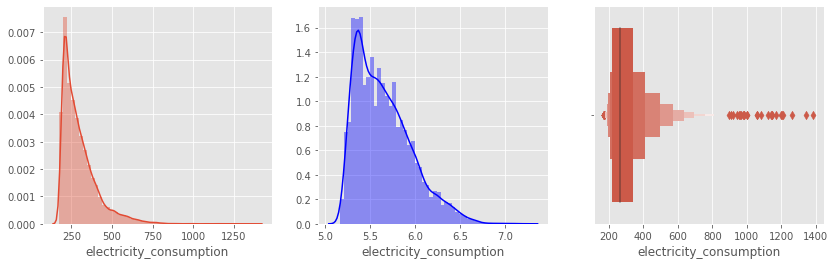

In [0]:
f,ax = plt.subplots(1,3,figsize=(14,4))
sns.distplot(train['electricity_consumption'],ax =ax[0])
sns.distplot(np.log(train['electricity_consumption']+1),ax=ax[1], color='b')
sns.boxenplot(train['electricity_consumption'],ax =ax[2])

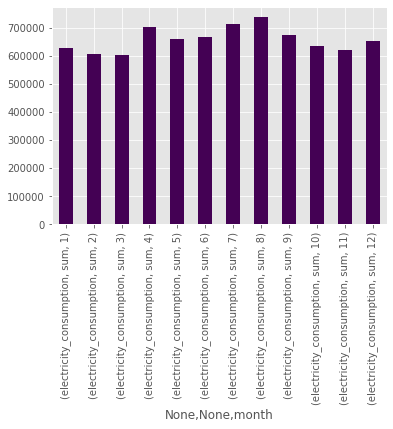

In [0]:
(train
 .groupby(['month',])
 .agg({'electricity_consumption':['sum',]})
 .unstack()
 .plot(kind='bar',cmap='viridis'))

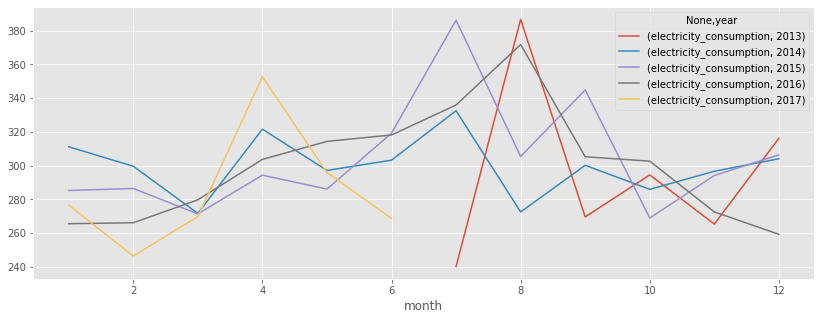

In [0]:
(train
 .groupby(['month','year'])
 .agg({'electricity_consumption':'mean'})
 .unstack()
 .plot(figsize=(14,5)))

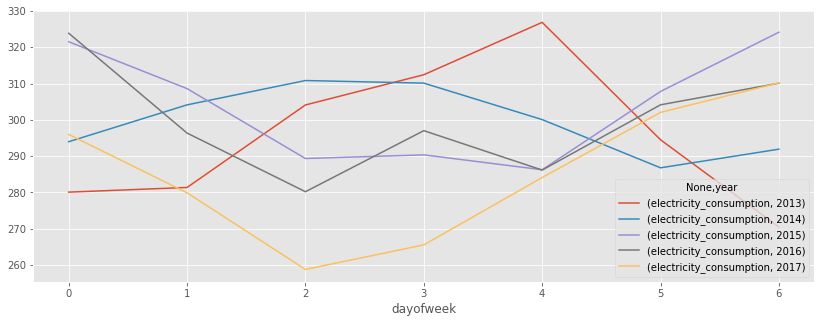

In [0]:
(train
 .groupby(['dayofweek','year'])
 .agg({'electricity_consumption':'mean'})
 .unstack()
 .plot(figsize=(14,5)))

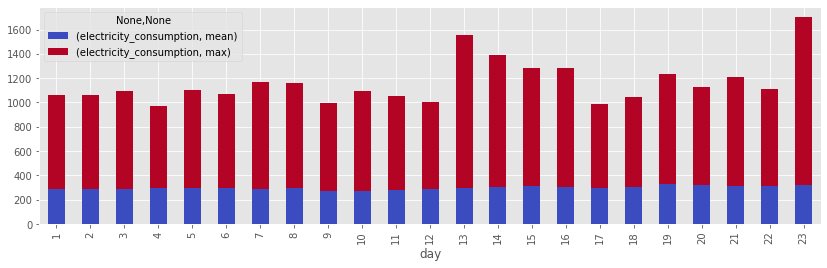

In [0]:
(train
.groupby(['day'])
.agg({'electricity_consumption':['mean','max']})
.plot(figsize=(14,4),kind='bar',stacked=True,cmap='coolwarm'))

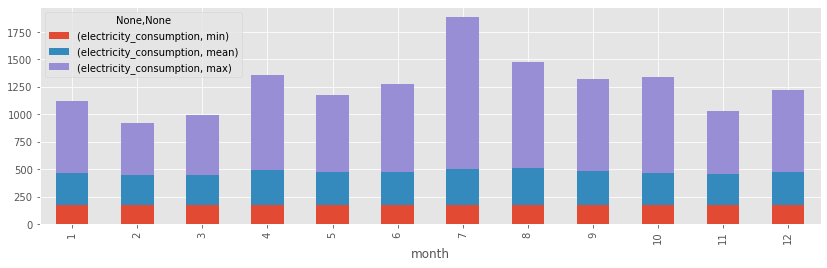

In [0]:
(train.groupby('month')
.agg({'electricity_consumption':['min','mean','max']})
 .plot(figsize=(14,4),kind='bar',stacked=True))

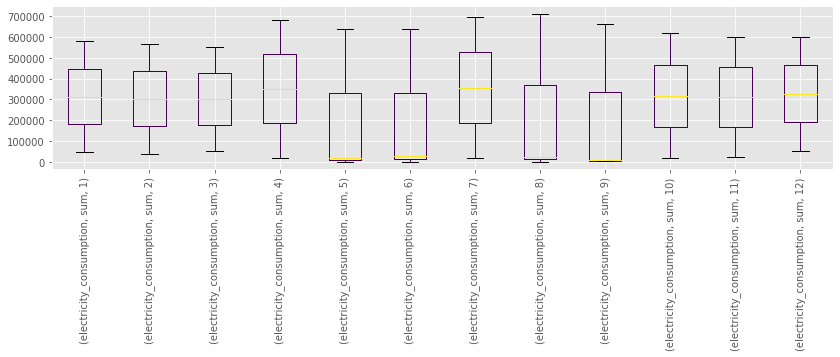

In [0]:
(train
 .groupby(['var2','month'])
 .agg({'electricity_consumption':['sum']})
 .unstack()
 .plot(figsize=(14,3),kind='box',stacked=True,cmap='viridis'))
plt.xticks(rotation=90);

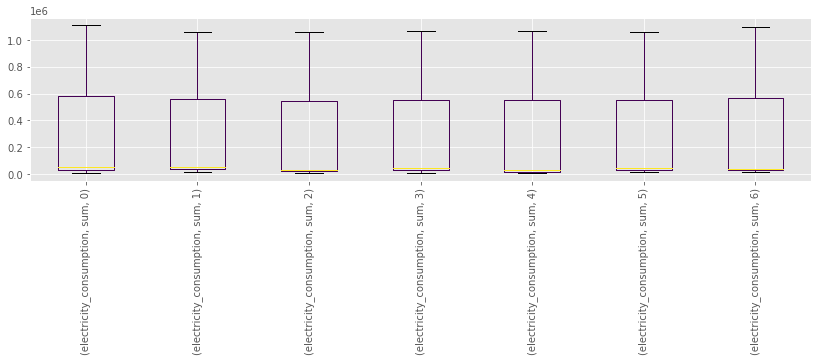

In [0]:

(train
 .groupby(['var2','dayofweek'])
 .agg({'electricity_consumption':['sum']})
 .unstack()
 .plot(figsize=(14,3),kind='box',stacked=True,cmap='viridis'))
plt.xticks(rotation=90);

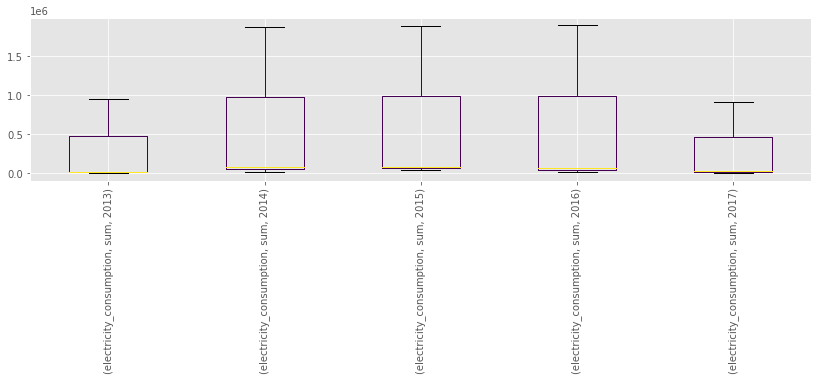

In [0]:
(train
 .groupby(['var2','year'])
 .agg({'electricity_consumption':['sum']})
 .unstack()
 .plot(figsize=(14,3),kind='box',stacked=True,cmap='viridis'))
plt.xticks(rotation=90);

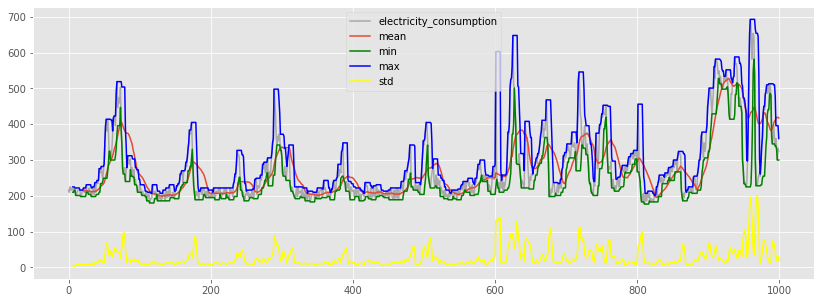

In [0]:
plt.figure(figsize=(14,5))
train['electricity_consumption'].head(1000).plot(color='darkgray')
train['electricity_consumption'].head(1000).rolling(window=23).mean().plot(label='mean')
#train['electricity_consumption'].head(1000).rolling(window=12).median().plot(label='median')
train['electricity_consumption'].head(1000).rolling(window=7).min().plot(label='min',color='g')
train['electricity_consumption'].head(1000).rolling(window=7).max().plot(label='max',color='b')
train['electricity_consumption'].head(1000).rolling(window=7).std().plot(label='std',color='yellow')
plt.legend()
#plt.savefig('Rolli

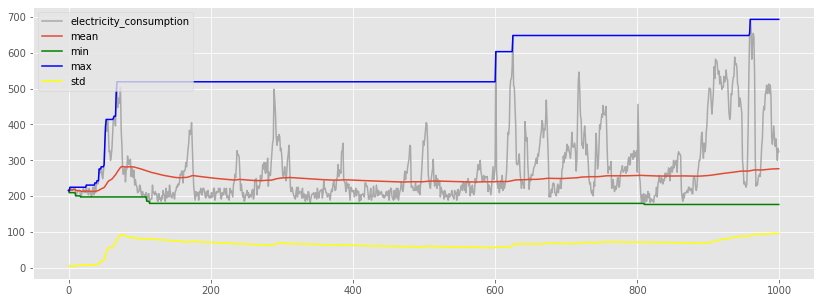

In [0]:
# Expanding window
plt.figure(figsize=(14,5))
train['electricity_consumption'].head(1000).plot(color='darkgray')
train['electricity_consumption'].head(1000).expanding().mean().plot(label='mean')
#train['sales'].head(1000).rolling(window=12).median().plot(label='median')
train['electricity_consumption'].head(1000).expanding().min().plot(label='min',color='g')
train['electricity_consumption'].head(1000).expanding().max().plot(label='max',color='b')
train['electricity_consumption'].head(1000).expanding().std().plot(label='std',color='yellow')
plt.legend()

In [0]:
def calc_stats(df, end,window,groupby=None,aggregates='mean',value='sales'):
    
    # dates
    last_date = pd.to_datetime(end) - pd.Timedelta(days=1)
    first_date = pd.to_datetime(end) - pd.Timedelta(days= window)
    # Aggregate
    df1 = df[(df.date >=first_date) & (df.date<= last_date) ]
    df_agg = df1.groupby(groupby)[value].agg(aggregates)
    # Change name of columns
    df_agg.name =  str(end).split(' ')[0]+'_' + '_'.join(groupby)+'_'+aggregates+'_'+ str(window)
    return df_agg.reset_index()

#sales_by_store_item
def sales_by_store_item(df, end, aggregates='mean', value='electricity_consumption'):
    
    print('Adding sales by store item')
    data = calc_stats(df,end, window=1,aggregates=aggregates, 
                      groupby=['var2'], value=value)
    print('window 1 added')
    
    for window in  [3,7,14,28,90,180,365]:
        agg = calc_stats(df,end, window=window, aggregates=aggregates,
                         groupby=['var2'], value=value )
        data = pd.merge(data,agg)
        print('window %d added'% window)
    return data

# sales by store item dayofweek
def sales_by_store_item_dayofweek(df, end, aggregates='mean', value='sales'):
    
    print('Adding sales by store item dayofweek')
    data = calc_stats(df,end, window=7, aggregates=aggregates,
                      groupby = ['var2','dayofweek'], value=value)
    print('window 7 added')
    
    for window in  [14,28,28*2,28*3,28*6,28*12]:
        agg = calc_stats(df,end, window=window, aggregates=aggregates,
                         groupby=['var2','dayofweek'], value=value )
        data = pd.merge(data,agg)
        print('window %d added'% window)
    return data

# sales_by_store_item_day
def sales_by_store_item_day(df, end, aggregates='mean', value='sales'):
    
    print('Adding sales by store item day')
    data = calc_stats(df,end, window=365, aggregates=aggregates,
                      groupby = ['var2','day'], value=value)
    print('window 365 added')
    
    return data

# Sales by item
def sales_by_item(df, end, aggregates='mean', value='sales'):
    
    print('Adding sales by item ')
    data = calc_stats(df,end, window=7, aggregates=aggregates,
                      groupby = ['var2'], value=value)
    print('window 7 added')
    
    for window in  [14,28,28*2]:
        agg = calc_stats(df,end, window=window, aggregates=aggregates,
                         groupby=['var2'], value=value )
        data = pd.merge(data,agg)
        print('window %d added'% window)
    return data

In [0]:
def calc_roll_stat(df,end,groupby=None,window=1,aggregate='mean'):
    # Rolling statistics method
    last_date = pd.to_datetime(end) - pd.Timedelta(days=1)
    first_date = pd.to_datetime(end) - pd.Timedelta(days=window)
    df1 = df[(df.date >= first_date) & (df.date <= last_date)]
    
    dfPivot = df1.set_index(['datetime']+groupby)['electricity_consumption'].unstack().unstack()
    dfPivot = dfPivot.rolling(window=window).mean().fillna(method='bfill')
    return dfPivot.stack().stack().rename(aggregate+str(window))

def calc_expand_stat(df,end,window=1,aggregate='mean'):
    # Expanding statistics method
    last_date = pd.to_datetime(end) - pd.Timedelta(days=1)
    first_date = pd.to_datetime(end) - pd.Timedelta(days=window)
    df1 = df[(df.date >= first_date) & (df.date <= last_date)]
    
    dfPivot = df1.set_index(['date','var2'])['electricity_consumption'].unstack().unstack()
    dfPivot = dfPivot.expanding(min_periods=window).mean().fillna(method='bfill')
    dfPivot = dfPivot.stack().stack().rename(aggregate+'_'+str(window)).reset_index()
    return dfPivot

def sales_by_store_item_expading(df,end,aggregate = 'mean', value = 'sales'):
    print('Adding consumption by expanding')
    data =calc_expand_stat(df,end,window=3, aggregate='mean')
    return data



In [0]:
def create_data1(sales,test,date):
    
    # Date input
    for i in range(2):
        end = pd.to_datetime(date) - pd.Timedelta(days=7*i+1)
        print(end)
    
        # Rolling feature
        #for aggregates in ['mean','min','max','sum','std']:
        for aggregates in ['mean','sum']:

            # store/item
            print('-'*20+'Aggregate by '+aggregates+'-'*20)
            data = sales_by_store_item(sales,end, aggregates=aggregates,value='electricity_consumption')
            sales = pd.merge(sales,data,on=['var2'],how='left')
            test = pd.merge(test,data,on=['var2'], how='left')

            # store/item/dayofweek
            df = sales_by_store_item_dayofweek(sales,end, aggregates=aggregates,value='electricity_consumption')
            #data = pd.merge(data,df,)
            sales = pd.merge(sales,df,on=['var2','dayofweek'],how='left')
            test = pd.merge(test,df,on=['var2','dayofweek'], how='left')

            # store/item/day
            df = sales_by_store_item_day(sales,end, aggregates=aggregates,value='electricity_consumption')
            #data = pd.merge(data,df)
            sales = pd.merge(sales,df,on=['var2','day'],how='left')
            test = pd.merge(test,df,on=['var2','day'], how='left')

            # sales/item
            df = sales_by_item(sales,end, aggregates=aggregates, value='electricity_consumption')
            data = pd.merge(data,df)
            #data = pd.merge(sales,data)
            sales = pd.merge(sales,df, on=['var2'],how='left')
            test = pd.merge(test,df, on=['var2'], how='left')

    return sales,test

In [0]:
tes_start = '2013-07-24'

In [0]:
train.columns

Index(['datetime', 'temperature', 'var1', 'pressure', 'windspeed', 'var2',
       'electricity_consumption', 'day', 'dayofweek', 'month', 'year',
       'is_month_end', 'is_month_start', 'weekofyear'],
      dtype='object')

In [0]:
# Rolling aggregation or lag feature for diffirend window size
train1,test1 = create_data1(train,test,tes_start)

In [0]:
train1['id'] = np.nan
train1['is_train'] = True
test1['is_train'] = False
test1['electricity_consumption'] = np.nan
# concat train,test
train_test = pd.concat([train1,test1],axis=0)

#Log transform
train_test['electricity_consumption_log'] = np.log(train_test['electricity_consumption']+1)
gc.collect()
train_test.shape

def one_hot_encoding(df,columns):
    print('Original shape',df.shape)
    df = pd.get_dummies(df,drop_first=True,columns=columns)
    print('After OHE', df.shape)
    return df

In [0]:
gc.collect()
train_test = one_hot_encoding(train_test,columns=['month','dayofweek'])


Original shape (35064, 98)
After OHE (35064, 113)


In [0]:
train_test.head()

,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,day,year,is_month_end,is_month_start,weekofyear,date,2013-07-23_var2_mean_1,2013-07-23_var2_mean_3,2013-07-23_var2_mean_7_x,2013-07-23_var2_mean_14_x,2013-07-23_var2_mean_28_x,2013-07-23_var2_mean_90,2013-07-23_var2_mean_180,2013-07-23_var2_mean_365,2013-07-23_var2_dayofweek_mean_7,2013-07-23_var2_dayofweek_mean_14,2013-07-23_var2_dayofweek_mean_28,2013-07-23_var2_dayofweek_mean_56,2013-07-23_var2_dayofweek_mean_84,2013-07-23_var2_dayofweek_mean_168,2013-07-23_var2_dayofweek_mean_336,2013-07-23_var2_day_mean_365,2013-07-23_var2_mean_7_y,2013-07-23_var2_mean_14_y,2013-07-23_var2_mean_28_y,2013-07-23_var2_mean_56,2013-07-23_var2_sum_1,2013-07-23_var2_sum_3,2013-07-23_var2_sum_7_x,2013-07-23_var2_sum_14_x,2013-07-23_var2_sum_28_x,2013-07-23_var2_sum_90,2013-07-23_var2_sum_180,...,2013-07-16_var2_sum_1,2013-07-16_var2_sum_3,2013-07-16_var2_sum_7_x,2013-07-16_var2_sum_14_x,2013-07-16_var2_sum_28_x,2013-07-16_var2_sum_90,2013-07-16_var2_sum_180,2013-07-16_var2_sum_365,2013-07-16_var2_dayofweek_sum_7,2013-07-16_var2_dayofweek_sum_14,2013-07-16_var2_dayofweek_sum_28,2013-07-16_var2_dayofweek_sum_56,2013-07-16_var2_dayofweek_sum_84,2013-07-16_var2_dayofweek_sum_168,2013-07-16_var2_dayofweek_sum_336,2013-07-16_var2_day_sum_365,2013-07-16_var2_sum_7_y,2013-07-16_var2_sum_14_y,2013-07-16_var2_sum_28_y,2013-07-16_var2_sum_56,id,is_train,electricity_consumption_log,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,0,216.0,1,2013,0,1,27,2013-07-01,250.0,250.333333,232.589286,235.142857,241.835227,241.835227,241.835227,241.835227,250.0,228.0,232.0625,232.0625,232.0625,232.0625,232.0625,214.0,232.589286,235.142857,241.835227,241.835227,6000.0,18024.0,39075.0,79008.0,127689.0,127689.0,127689.0,...,4944.0,17916.0,39933.0,83478.0,88614.0,88614.0,88614.0,88614.0,4944.0,11142.0,16278.0,16278.0,16278.0,16278.0,16278.0,5136.0,39933.0,83478.0,88614.0,88614.0,NaN,True,5.379897,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,0,210.0,1,2013,0,1,27,2013-07-01,250.0,250.333333,232.589286,235.142857,241.835227,241.835227,241.835227,241.835227,250.0,228.0,232.0625,232.0625,232.0625,232.0625,232.0625,214.0,232.589286,235.142857,241.835227,241.835227,6000.0,18024.0,39075.0,79008.0,127689.0,127689.0,127689.0,...,4944.0,17916.0,39933.0,83478.0,88614.0,88614.0,88614.0,88614.0,4944.0,11142.0,16278.0,16278.0,16278.0,16278.0,16278.0,5136.0,39933.0,83478.0,88614.0,88614.0,NaN,True,5.351858,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,0,225.0,1,2013,0,1,27,2013-07-01,250.0,250.333333,232.589286,235.142857,241.835227,241.835227,241.835227,241.835227,250.0,228.0,232.0625,232.0625,232.0625,232.0625,232.0625,214.0,232.589286,235.142857,241.835227,241.835227,6000.0,18024.0,39075.0,79008.0,127689.0,127689.0,127689.0,...,4944.0,17916.0,39933.0,83478.0,88614.0,88614.0,88614.0,88614.0,4944.0,11142.0,16278.0,16278.0,16278.0,16278.0,16278.0,5136.0,39933.0,83478.0,88614.0,88614.0,NaN,True,5.420535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,0,216.0,1,2013,0,1,27,2013-07-01,250.0,250.333333,232.589286,235.142857,241.835227,241.835227,241.835227,241.835227,250.0,228.0,232.0625,232.0625,232.0625,232.0625,232.0625,214.0,232.589286,235.142857,241.835227,241.835227,6000.0,18024.0,39075.0,79008.0,127689.0,127689.0,127689.0,...,4944.0,17916.0,39933.0,83478.0,88614.0,88614.0,88614.0,88614.0,4944.0,11142.0,16278.0,16278.0,16278.0,16278.0,16278.0,5136.0,39933.0,83478.0,88614.0,88614.0,NaN,True,5.379897,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,0,222.0,1,2013,0,1,27,2013-07-01,250.0,250.333333,232.589286,235.142857,241.835227,241.835227,241.835227,241.835227,250.0,228.0,232.0625,232.0625,232.0625,232.0625,232.0

In [0]:
col_drop = ['id','is_train','electricity_consumption','electricity_consumption_log','datetime']
X = train_test[train_test['is_train'] == True].drop(col_drop, axis=1)
y = train_test[train_test['is_train'] == True]['electricity_consumption_log']
test_new = train_test[train_test['is_train'] == False].drop(col_drop +['date'],axis=1)

# Time series based split
#Time series start time: "2013-01-01 00:00:00" and end time: "2017-12-31 00:00:00"
#Time series start time: "2018-01-01 00:00:00" and end time: "2018-03-31 00:00:00"
tra_start, tra_end = '2013-07-01','2016-07-01'
val_start, val_end = '2016-07-02','2017-06-23'
tes_start = '2013-07-24'
X_train = X[X.date.isin(pd.date_range(tra_start,tra_end))].drop(['date'],axis=1)
X_valid = X[X.date.isin(pd.date_range(val_start, val_end))].drop(['date'],axis=1)
y_train = y[X.date.isin(pd.date_range(tra_start,tra_end))]
y_valid = y[X.date.isin(pd.date_range(val_start, val_end))]
gc.collect()
X.shape,test_new.shape

((26496, 108), (8568, 107))

In [0]:
def smape(y_true,y_pred):
    
    n = len(y_pred)
    masked_arr = ~((y_pred==0)&(y_true==0))
    y_pred, y_true = y_pred[masked_arr], y_true[masked_arr]
    nom = np.abs(y_true - y_pred)
    denom = np.abs(y_true) + np.abs(y_pred)
    smape = 200/n * np.sum(nom/denom)
    return smape
def lgb_smape(pred,train_data):
    ''' 
    Custom evaluvation function
    '''
    label = train_data.get_label()
    smape_val = smape(np.expm1(pred), np.expm1(label))
    return 'SMAPE',smape_val, False

In [0]:
def lgb_model(X_train, X_valid, y_valid, y_test,test_new):
    lgb_param = {}
    lgb_param['boosting_type'] ='gbdt'
    lgb_param['max_depth'] = 9
    lgb_param['num_leaves'] = 2**7
    lgb_param['learning_rate'] = 0.05
    #lgb_param['n_estimators'] = 3000
    lgb_param['feature_fraction'] = 0.9
    lgb_param['bagging_fraction'] = 0.9
    lgb_param['lambda_l1'] = 0.06
    lgb_param['lambda_l2'] =  0.1
    lgb_param['random_state'] = seed
    lgb_param['n_jobs'] = 4
    lgb_param['silent'] = -1
    lgb_param['verbose'] = -1
    lgb_param['metric'] = 'mae'
    
    model = lgb.LGBMRegressor(**lgb_param)
    lgb_train = lgb.Dataset(X_train,y_train)
    lgb_valid = lgb.Dataset(X_valid,y_valid)
    valid_set = [lgb_train,lgb_valid]
    model = lgb.train(params=lgb_param,train_set=lgb_train,valid_sets=valid_set,num_boost_round= 1000,
                      feval=lgb_smape,early_stopping_rounds=50,)
    print('-'*10,'*'*20,'-'*10)
    #model.fit(X_train,y_train, eval_set= [(X_train,y_train),(X_valid,y_valid)],
    #          eval_metric ='rmse',early_stopping_rounds=20,verbose=100)
    
    y_pred = model.predict(X_valid)
    print('Root mean_squared_error','-'*20 ,np.sqrt(mean_squared_error(y_valid, y_pred)))
    y_pred_new = model.predict(test_new)
    return y_pred_new, model

In [0]:
# Model training
y_pred_new, model = lgb_model(X_train, X_valid, y_valid, y_valid,test_new)

[1]	training's l1: 0.246363	training's SMAPE: 24.3542	valid_1's l1: 0.250365	valid_1's SMAPE: 24.7341
Training until validation scores don't improve for 50 rounds.
[2]	training's l1: 0.240341	training's SMAPE: 23.7767	valid_1's l1: 0.245501	valid_1's SMAPE: 24.2683
[3]	training's l1: 0.235177	training's SMAPE: 23.2815	valid_1's l1: 0.241061	valid_1's SMAPE: 23.8432
[4]	training's l1: 0.229429	training's SMAPE: 22.727	valid_1's l1: 0.236327	valid_1's SMAPE: 23.3862
[5]	training's l1: 0.226101	training's SMAPE: 22.4055	valid_1's l1: 0.234651	valid_1's SMAPE: 23.2243
[6]	training's l1: 0.22111	training's SMAPE: 21.9229	valid_1's l1: 0.230897	valid_1's SMAPE: 22.8624
[7]	training's l1: 0.21659	training's SMAPE: 21.4855	valid_1's l1: 0.227304	valid_1's SMAPE: 22.5149
[8]	training's l1: 0.212065	training's SMAPE: 21.0458	valid_1's l1: 0.224014	valid_1's SMAPE: 22.1956
[9]	training's l1: 0.209332	training's SMAPE: 20.7796	valid_1's l1: 0.222691	valid_1's SMAPE: 22.0673
[10]	training's l1: 0.2

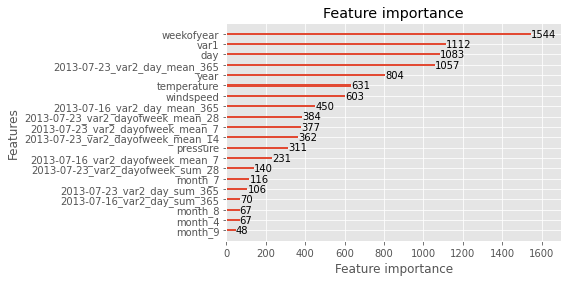

In [0]:
lgb.plot_importance(model,max_num_features=20);

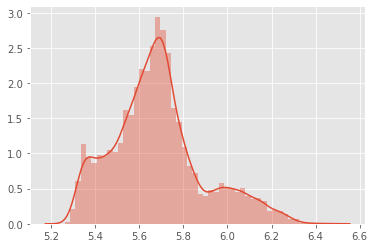

In [0]:
sns.distplot(y_pred_new)


In [0]:
y_pred_new1 = np.exp(y_pred_new)-1
y_pred_new2=np.round(y_pred_new1,0)
y_pred_new2

array([239., 239., 236., 259., ..., 209., 207., 208., 210.])

In [0]:
sample['electricity_consumption']=y_pred_new2
sample.to_csv("submit3.csv",index=False)
files.download("submit3.csv")